# Simple Exploratory Data and Regression Analysis in Python 

## Marius G. Sampid
## 01 November 2018

In this report, I present a simple exploratory data and regression analysis using the publicly available diamond data set, which can be found in https://vincentarelbundock.github.io/Rdatasets/datasets.html.

This report is divided into two sections: Section one is a simple exploratory data analysis and visualization. Second two is regression analysis using the scikit-learn package to predict future diamond prices.

## Section one
### Data description:
carat: weight of the diamond (0.2-5.01),

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal),

color: diamond colour, from J (worst) to D (best),

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)),

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79),

table: width of top of diamond relative to widest point (43-95),

price: price in US dollars (\$326-\$18,823),

x: length in mm (0-10.74),

y: width in mm (0-58.9),

z: depth in mm (0-31.8).

In [1]:
# import necessary packages to explore data and conduct statistical analysis.

import numpy as np
import pandas as pd

from pandas import DataFrame

import matplotlib.pyplot as plt   # import the plotting library
from matplotlib import rcParams
#from pylab import rcParams

import seaborn as sb

# import necessary packages for Regression analysis
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter


In [2]:
%matplotlib inline               
rcParams['figure.figsize'] = 8, 6 # sets dimension of figure size. 
sb.set_style('whitegrid')        

In [3]:
address =  "C:/Users/mariu/Desktop/deskTopFiles/DataAnalysis_R_Python/SampleData.csv" # see address path where data is stored

myData = pd.read_csv(address) # import data into python and save in an object called myData
#myData.columns = ['carat','cut','color','clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
print(myData.head()) # See a quick snapshot of the data to make sure that the data was correctly imported into python

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [4]:
myData.shape # see the dimension of imported data

(53940, 10)

In [5]:
myData.isna().sum() # check for missing values

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

 We see that there are no missing values in the data set.

In [6]:
myData.isnull().sum() # check for NULL value

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
myData.describe() # calculates summary statistics of the numeric variables.

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
myData.skew() # calculates skewness 

carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64

In [9]:
myData.kurt()-3 # calculates excess kurtosis

carat    -1.743365
depth     2.739415
table    -0.198143
price    -0.822304
x        -3.618161
y        88.214557
z        44.086619
dtype: float64

From the above outputs, we deduced that the data set has 53940 observations and  10 variables (i.e, 53940 rows and 10 columns). Of the 10 variables, we have three categorical and 7 numeric variables. The numeric variables are far from being normally distributed as exhibited by their excess positive and negative kurtosis and skewness.



### Let's visualize the distribution of the numeric variables using plots as seen below: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023319C1D438>,
      dtype=object)

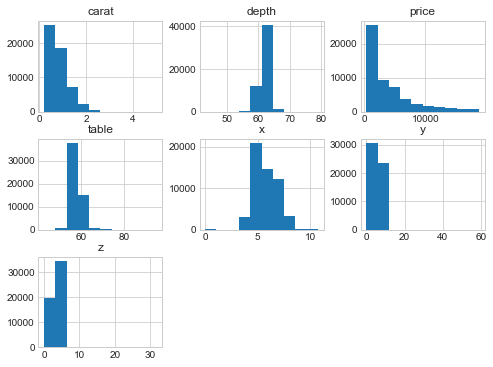

In [11]:
myData.hist() # 

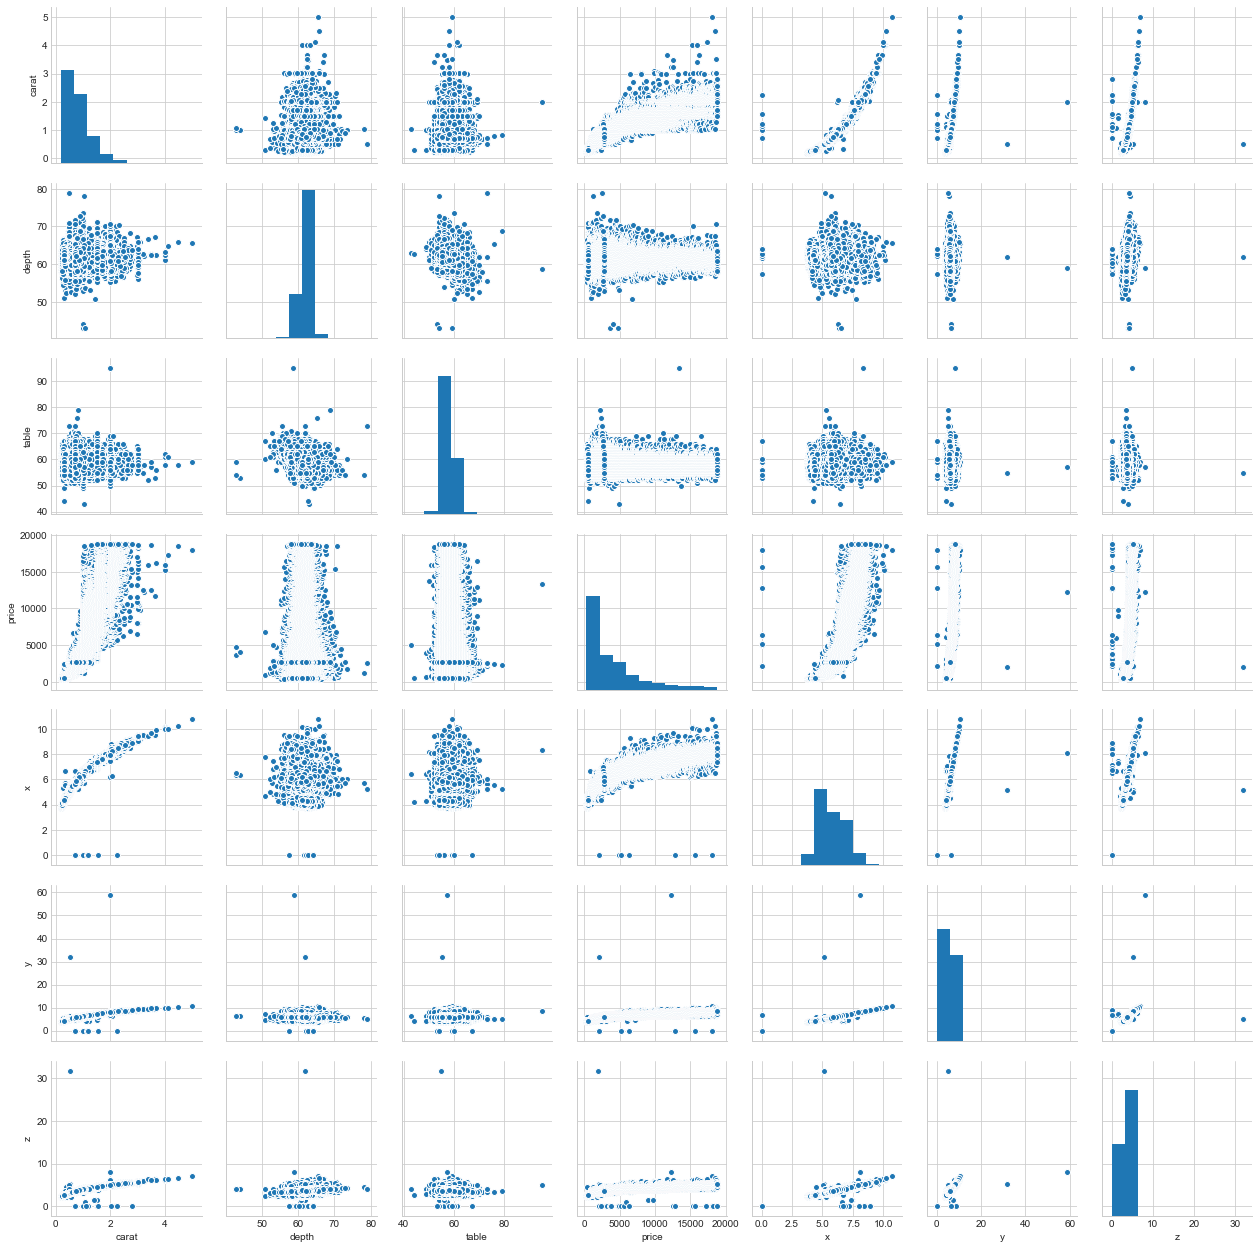

In [12]:
sb.pairplot(myData, palette='hls') 

## We now take a closer look at the factor (Categorical) variables

First, we visualize the distribution of the data set across the various categories in relation to price using boxplots as follows:

Text(0,0.5,'Price')

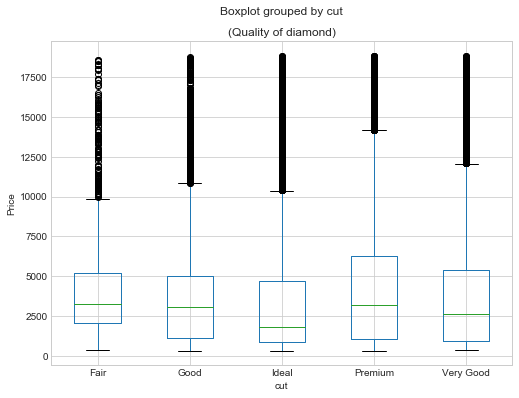

In [13]:
myData.boxplot(column = "price", by="cut")
plt.title("(Quality of diamond)")
plt.ylabel("Price")

Text(0,0.5,'Price')

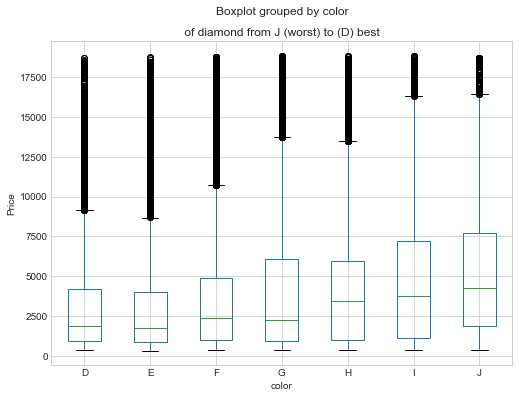

In [14]:
myData.boxplot(column = "price", by="color")
plt.title(" of diamond from J (worst) to (D) best ")
plt.ylabel("Price")

Text(0,0.5,'Price')

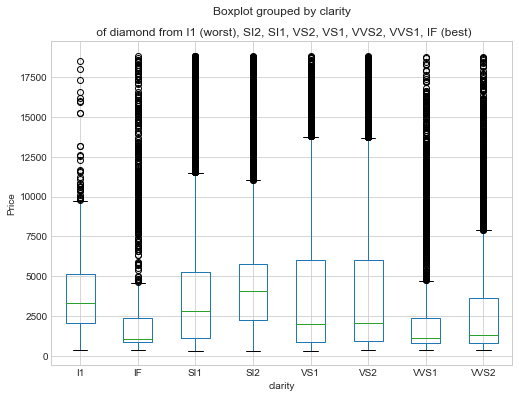

In [15]:
myData.boxplot(column = "price", by="clarity")
plt.title(" of diamond from I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)")
plt.ylabel("Price")

We can see from the above boxplots that the distribution of the diamond data set with respect to price in the various categories are all skewed with huge outliers.

### What was the distribution of the diamond data set based on the quality (cut), color, and clarity of diamond in terms of price? The following code gives us the answer:

In [16]:
myData3 = myData[["price","cut"]]
mydata31 = myData3.groupby(['cut']) # count
mydata31.describe()

price                                                             \
             count         mean          std    min      25%     50%      75%   
cut                                                                             
Fair        1610.0  4358.757764  3560.386612  337.0  2050.25  3282.0  5205.50   
Good        4906.0  3928.864452  3681.589584  327.0  1145.00  3050.5  5028.00   
Ideal      21551.0  3457.541970  3808.401172  326.0   878.00  1810.0  4678.50   
Premium    13791.0  4584.257704  4349.204961  326.0  1046.00  3185.0  6296.00   
Very Good  12082.0  3981.759891  3935.862161  336.0   912.00  2648.0  5372.75   

                    
               max  
cut                 
Fair       18574.0  
Good       18788.0  
Ideal      18806.0  
Premium    18823.0  
Very Good  18818.0

We see that there were 1610 diamonds grouped as Fair, 4906 diamonds grouped as Good, 21551 diamonds grouped as Ideal, 13791 diamonds grouped as Premium, and 12082 diamonds grouped as Very Good. We also see for each category the minimum and maximum prices, standard deviation, mean, median,first and third quartile.  

Let's do thesame for color and clarity of diamond:

In [17]:
myData4 = myData[["price","color"]]
mydata41 = myData4.groupby(['color']) 
mydata41.describe() # Note if we want just the count we can simply use the "mydata41.count()" function

price                                                            \
         count         mean          std    min     25%     50%      75%   
color                                                                      
D       6775.0  3169.954096  3356.590935  357.0   911.0  1838.0  4213.50   
E       9797.0  3076.752475  3344.158685  326.0   882.0  1739.0  4003.00   
F       9542.0  3724.886397  3784.992007  342.0   982.0  2343.5  4868.25   
G      11292.0  3999.135671  4051.102846  354.0   931.0  2242.0  6048.00   
H       8304.0  4486.669196  4215.944171  337.0   984.0  3460.0  5980.25   
I       5422.0  5091.874954  4722.387604  334.0  1120.5  3730.0  7201.75   
J       2808.0  5323.818020  4438.187251  335.0  1860.5  4234.0  7695.00   

                
           max  
color           
D      18693.0  
E      18731.0  
F      18791.0  
G      18818.0  
H      18803.0  
I      18823.0  
J      18710.0

In [18]:
myData5 = myData[["price","clarity"]]
mydata51 = myData5.groupby(['clarity']) # count
mydata51.describe()

price                                                             \
           count         mean          std    min      25%     50%      75%   
clarity                                                                       
I1         741.0  3924.168691  2806.778270  345.0  2080.00  3344.0  5161.00   
IF        1790.0  2864.839106  3920.248499  369.0   895.00  1080.0  2388.50   
SI1      13065.0  3996.001148  3799.483853  326.0  1089.00  2822.0  5250.00   
SI2       9194.0  5063.028606  4260.458578  326.0  2264.00  4072.0  5777.25   
VS1       8171.0  3839.455391  4011.747958  327.0   876.00  2005.0  6023.00   
VS2      12258.0  3924.989395  4042.302816  334.0   900.00  2054.0  6023.75   
VVS1      3655.0  2523.114637  3334.838888  336.0   816.00  1093.0  2379.00   
VVS2      5066.0  3283.737071  3821.647537  336.0   794.25  1311.0  3638.25   

                  
             max  
clarity           
I1       18531.0  
IF       18806.0  
SI1      18818.0  
SI2      18804.0  
VS1      18795.0  
VS2      18823.0  
VVS1     18777.0  
VVS2     18768.0

### To see the total price (in US dollars) on each category of the quality of diamond, diamond color and diamond clarity, we use the following codes:

In [19]:
myData6 = myData[["price","cut","color","clarity"]]

myData6_a = myData6.groupby(myData6['cut']) 
print(myData6_a.sum())

              price
cut                
Fair        7017600
Good       19275009
Ideal      74513487
Premium    63221498
Very Good  48107623


In [20]:
myData6 = myData[["price","cut","color","clarity"]]

myData6_b = myData6.groupby(myData6['color']) 
print(myData6_b.sum())

          price
color          
D      21476439
E      30142944
F      35542866
G      45158240
H      37257301
I      27608146
J      14949281


In [21]:
myData6 = myData[["price","cut","color","clarity"]]

myData6_c = myData6.groupby(myData6['clarity']) 
print(myData6_c.sum())

            price
clarity          
I1        2907809
IF        5128062
SI1      52207755
SI2      46549485
VS1      31372190
VS2      48112520
VVS1      9221984
VVS2     16635412


### To see the total weights, in carats, of each category of diamond, we can use the following code: 

In [22]:
myData7 = myData[["carat","cut","color","clarity"]]

myData7_a = myData7.groupby(myData7['cut']) 
print(myData7_a.sum())

              carat
cut                
Fair        1684.28
Good        4166.10
Ideal      15146.84
Premium    12300.95
Very Good   9742.70


In [23]:
myData7_b = myData7.groupby(myData7['color']) 
print(myData7_b.sum())

         carat
color         
D      4456.56
E      6445.12
F      7028.05
G      8708.28
H      7571.58
I      5568.00
J      3263.28


In [24]:
myData7_c = myData7.groupby(myData7['clarity']) 
print(myData7_c.sum())

            carat
clarity          
I1         951.33
IF         904.17
SI1      11111.55
SI2       9907.90
VS1       5941.61
VS2       9364.31
VVS1      1839.64
VVS2      3020.36


We can also use other aggregate functions to get information such as summary statistics, max, mean, median, and counts values if necessary. For example, let's see the maximum price in each category based on the quality of diamond (cut) and the corresponding values for color and clarity:

In [25]:
myData8 = myData[["price","cut","color","clarity"]]
myData8a = myData8.groupby(myData8['cut']) 
print(myData8a.max())

           price color clarity
cut                           
Fair       18574     J    VVS2
Good       18788     J    VVS2
Ideal      18806     J    VVS2
Premium    18823     J    VVS2
Very Good  18818     J    VVS2


##  Section two

### Regression Analysis

## Let’s model the relationship between price and weight (carat) of diamond. That is, we want to see how a unit change in the weight of diamond will affect price. We will also use the linear model to predict future diamond prices.

This can be done by a simple linear regression model. The relevant packages have been imported as seen above. For the regression analysis, we need a small sample of our data set. The data contains over 50,000 observations, so it will make no sense to try to fit a linear regression model to all data points as it will be too compact, and figures will be difficult to analyze.

Let’s collect a random sample of 50 observations from our data set for regression analysis: 


In [26]:
# Collect a random sample of 50 observations without replacement.
np.random.seed(4) #3
MySampleData = myData.sample(frac=50/len(myData.index), replace=False) # OR simply: myData.sample(50, replace=False)
print(MySampleData.head())

       carat    cut color clarity  depth  table  price     x     y     z
48479   0.56  Ideal     G    VVS2   61.2   55.0   1979  5.35  5.37  3.28
30207   0.34  Ideal     E     SI1   60.4   57.0    723  4.53  4.55  2.74
6934    0.80  Ideal     F    VVS2   61.6   57.0   4140  5.97  5.94  3.67
52520   0.70  Ideal     F     SI1   61.8   56.0   2528  5.68  5.75  3.53
8034    0.88  Ideal     H    VVS1   62.0   59.0   4334  6.12  6.13  3.80


In [27]:
MySampleData.shape # see dimension of sample data to be sure that we have imported 50 rows and the corresponding columns 

(50, 10)

Let's see the summary statistics of the numeric variables of our sample data:

In [28]:
print(MySampleData.describe()) # see summary statistics 

           carat      depth      table         price          x          y  \
count  50.000000  50.000000  50.000000     50.000000  50.000000  50.000000   
mean    0.788200  61.522000  57.980000   3665.200000   5.779800   5.777600   
std     0.370414   1.567565   2.486617   3436.772721   0.965426   0.965599   
min     0.200000  55.000000  54.000000    367.000000   3.770000   3.720000   
25%     0.502500  61.125000  56.000000   1348.250000   5.075000   5.050000   
50%     0.765000  61.750000  57.000000   2610.000000   5.900000   5.920000   
75%     1.085000  62.300000  59.000000   4710.250000   6.595000   6.557500   
max     1.550000  63.600000  66.000000  16343.000000   7.390000   7.450000   

               z  
count  50.000000  
mean    3.555200  
std     0.601529  
min     2.310000  
25%     3.162500  
50%     3.600000  
75%     4.050000  
max     4.590000  


Let’s look at Pearson’s correlation coefficients, $\rho_{r}$, between the numeric variables:

In [29]:
print(MySampleData.corr("pearson"))

          carat     depth     table     price         x         y         z
carat  1.000000  0.077077  0.134230  0.886571  0.980620  0.982201  0.984605
depth  0.077077  1.000000 -0.592035  0.102789 -0.019659 -0.009726  0.136640
table  0.134230 -0.592035  1.000000  0.043850  0.170021  0.153737  0.067745
price  0.886571  0.102789  0.043850  1.000000  0.816424  0.824862  0.829339
x      0.980620 -0.019659  0.170021  0.816424  1.000000  0.998509  0.987155
y      0.982201 -0.009726  0.153737  0.824862  0.998509  1.000000  0.988783
z      0.984605  0.136640  0.067745  0.829339  0.987155  0.988783  1.000000


Before we proceed with regression analysis, let’s look at some strict assumptions associated with linear models for regression analysis: 
  1. All variables are continuous numeric variables and not categorical ones, 
  2. the data is free of missing values and outliers, 
  3. there’s a linear relationship between the dependent and independent variables, 
  4. all explanatory or independent variables are independent of one another, and finally, 
  5. the residuals are normally distributed.
  
We can see from the Pearson's correlation matrix that there is a strong linear relationship between price and and weight (carat) of diamond with $\rho_{r} = 88.7\%$. 

Let's check for outliers using boxplots:

Text(0,0.5,'Price of diamond')

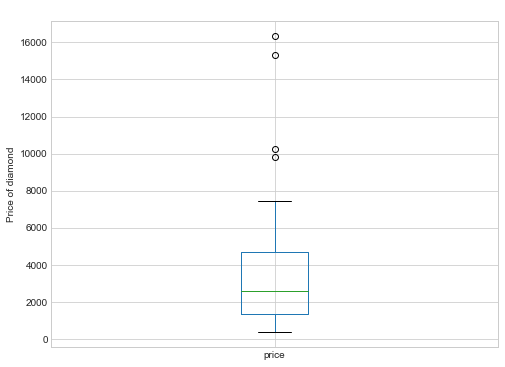

In [30]:
MySampleData.boxplot(column = "price")
plt.title(" ")
plt.ylabel("Price of diamond")
#plt.xlabel(" ")

Text(0,0.5,'weight of diamond (Carat)')

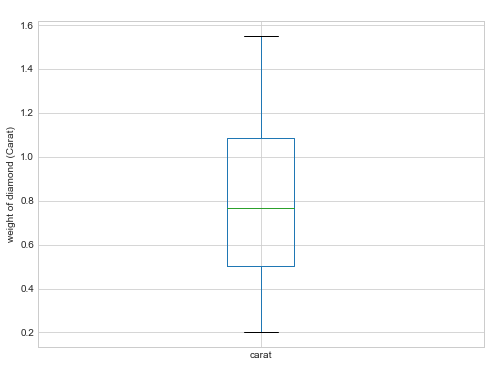

In [31]:
MySampleData.boxplot(column = "carat")
plt.title(" ")
plt.ylabel("weight of diamond (Carat)")
#plt.xlabel(" ")

We can see that there are four data points in the price variable as outliers. We need to remove these outliers and the corresponding rows in the sample data set. But before we do that, let's take a look at the scatter plot between price and carat:

Text(0.5,0,'Carat ')

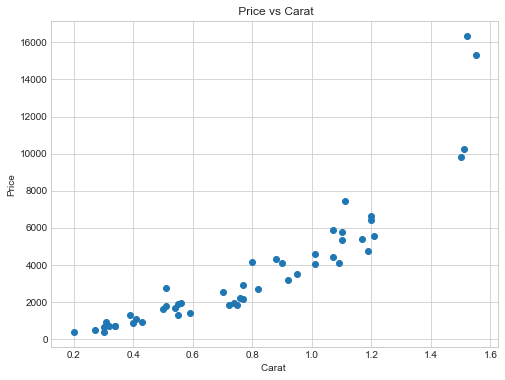

In [32]:
plt.scatter(MySampleData["carat"] , MySampleData["price"]) # c=['blue'], s=150)
plt.title(" Price vs Carat")
plt.ylabel("Price")
plt.xlabel("Carat ")

The outliers are clearly visible in the scatter plot. Now lets remove the outliers.

A “rule of thumb”: any point in a data set that is greater than 𝑄3+1.5∗𝐼𝑄𝑅 or less than 𝑄1−1.5∗𝐼𝑄𝑅 is considered an outlier, where 𝑄1 is the First Quartile, 𝑄3 is the Third Quartile, and 𝐼𝑄𝑅 is the interquartile range.
Let’s remove the outliers in the price variable and the corresponding rows in the carat variable. The outliers in the price variable are greater than 𝑄3+1.5∗𝐼𝑄𝑅, so we remove these outliers as follows:

Start by calculating the IQR:

In [33]:
Q3 = np.percentile(MySampleData["price"], 75)
Q1 = np.percentile(MySampleData["price"], 25)
IQR = Q3 - Q1                                 #Calculate inter quartile range (IQR)
IQR

3362.0

Determine the cutt-off point. That is, the point where any other point above it will be considered an outlier:

In [34]:
cutoff_point = Q3 + 1.5*IQR
cutoff_point

9753.25

Let's isolate and see the four outliers in the price variable and the corresponding rows in the sample data set:

In [35]:
price_outliers = MySampleData["price"] > cutoff_point
print(MySampleData[price_outliers])

       carat    cut color clarity  depth  table  price     x     y     z
26606   1.52  Ideal     G    VVS1   61.4   57.0  16343  7.38  7.40  4.54
22219   1.51   Good     H     SI1   61.5   61.0  10277  7.29  7.34  4.50
21744   1.50  Ideal     J    VVS1   62.2   59.0   9814  7.30  7.32  4.55
26073   1.55  Ideal     E     VS2   61.9   58.0  15293  7.39  7.45  4.59


Let's remove the outliers from the sample data:

In [36]:
remove_price_outliers = MySampleData["price"] < cutoff_point # remove outliers. note the difference in "<" sign.
MySampleData_2 = MySampleData[remove_price_outliers] 
MySampleData_2.shape                                  # check if outliers have been removed

(46, 10)

Now, let's visualize our sample data to see that outliers have been removed: 

Text(0,0.5,'Price of diamond')

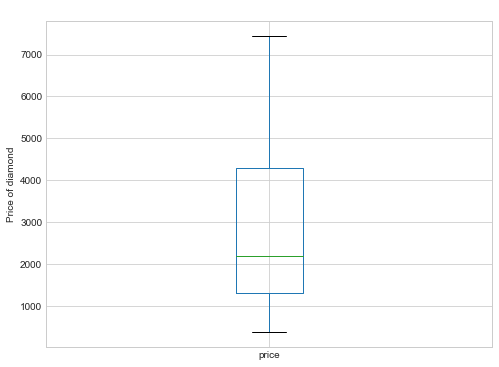

In [37]:
MySampleData_2.boxplot(column = "price")
plt.title(" ")
plt.ylabel("Price of diamond")
#plt.xlabel(" ")

Text(0,0.5,'weight of diamond (Carat)')

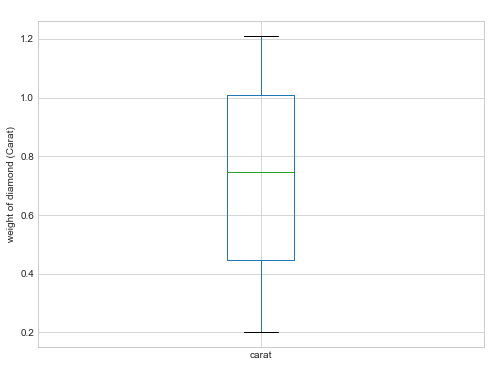

In [38]:
MySampleData_2.boxplot(column = "carat")
plt.title(" ")
plt.ylabel("weight of diamond (Carat)")
#plt.xlabel(" ")

Text(0.5,0,'Carat ')

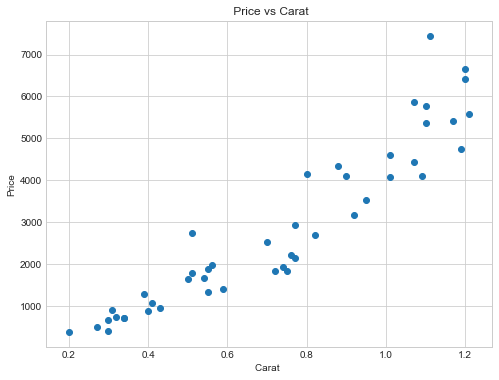

In [39]:
plt.scatter(MySampleData_2["carat"] , MySampleData_2["price"]) # c=['blue'], s=150)
plt.title(" Price vs Carat")
plt.ylabel("Price")
plt.xlabel("Carat ")

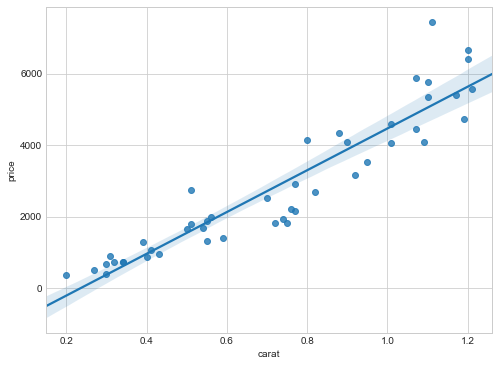

In [40]:
sb.regplot(x='carat', y='price', data=MySampleData_2, scatter=True) # fit a regression line to the sample data

Just in case, lets check again for missing values in our sample data set:

In [41]:
missing_values = MySampleData_2==np.NAN             # check for missing values
MySampleData_2[missing_values == True].sum() # returns rows that have missing values

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

Check Pearson's correlation coefficient between price and carat:

In [42]:
MySampleData_3 = MySampleData_2[["price", "carat"]] # see new correlation coefficient
print(MySampleData_3.corr("pearson"))

          price     carat
price  1.000000  0.934976
carat  0.934976  1.000000


Great, our sample data set is now free of outliers and there is a strong linear relationship between price and weight of diamond with $\rho_{r} = 93.5\%$. We also know that the sample data set contains no missing values, so we can now proceed in fitting the linear model with X = carat as the independent or explanatory variable and y = price as the dependent variable. The model is:

$y = \beta_{0} + \beta_{1}X_{1} + \mu_{i}$,

where $\mu$ is the residuals or error term. 

We obtain the Best Linear Unbiased Estimator (BLUE) by minimizing the sum of the squared errors or residuals as:

$min \sum_{i=1}^{n}\mu_{i}^{2}$.

To achieve BLUE, the following properties must hold:

$\sum_{i=1}^{n}\mu_{i}=0$

$\sum_{i=1}^{n}X_{i}\mu_{i}=0$

$\bar{y} = \hat{\beta}_{0} + \hat{\beta}_{1}\bar{X}$.

In [43]:
print(MySampleData_2.head()) # see first few rows of the sample data for subsetting

       carat    cut color clarity  depth  table  price     x     y     z
48479   0.56  Ideal     G    VVS2   61.2   55.0   1979  5.35  5.37  3.28
30207   0.34  Ideal     E     SI1   60.4   57.0    723  4.53  4.55  2.74
6934    0.80  Ideal     F    VVS2   61.6   57.0   4140  5.97  5.94  3.67
52520   0.70  Ideal     F     SI1   61.8   56.0   2528  5.68  5.75  3.53
8034    0.88  Ideal     H    VVS1   62.0   59.0   4334  6.12  6.13  3.80


In [44]:
X = pd.DataFrame(MySampleData_2["carat"])
y = pd.DataFrame(MySampleData_2["price"])
#Before using our variables as predictors in the linear model, we have to be sure to scale them

X, y = scale(X), y # note that the 'scale' is applied only to the independent variables or predictors
Lin_Reg = LinearRegression(normalize=True) # normalize=True tells the regression model to normalize our values before regression

Lin_Reg.fit(X,y)

print (Lin_Reg.score(X,y)) # Gives us the R-squared


0.8741799272941845


R-squared tells us how much we have explained; the goodness of fit (GoF). R-squared = 0.8742 imply that 87.42% of the variations in 𝑦-variable is being explained by the 𝑋-variable, and there is a residual of (100−87.42)% = 12.58% going unexplained. The higher the R-squared the better the GoF and vice versa.

Let's get the coeffiecients and write down the fitted model:

In [45]:
print(Lin_Reg.coef_)

[[1804.97776813]]


In [46]:
print(Lin_Reg.intercept_)

[2859.41304348]


We deduce that the fitted model is:
    
$\hat{y} = 2859.41 + 1804.98X_{1}.$
    


To predict future diamond prices using the fitted model, we use the following code:

In [47]:
predictions = Lin_Reg.predict(X)
print(predictions[0:10]) # gives the first 10 predictions of diamond prices

[[1898.26264797]
 [ 613.34296467]
 [3299.99321156]
 [2715.93881007]
 [3767.23673276]
 [5636.21081756]
 [1606.23544722]
 [ 905.37016542]
 [5460.99449711]
 [3124.77689112]]


In [48]:
len(predictions) # check the length of just to be sure

46

### Multiple linear regression
One of the assumptions of multiple linear regression analysis is that the explanatory variables should be independent of each other. Looking at the correlation matrix above, a good candidate for the explanatory or independent variables should be carat, depth and table since the correlation between them are very low or insignificant. 

Let's isolate these variables and visualize them using pair plots:

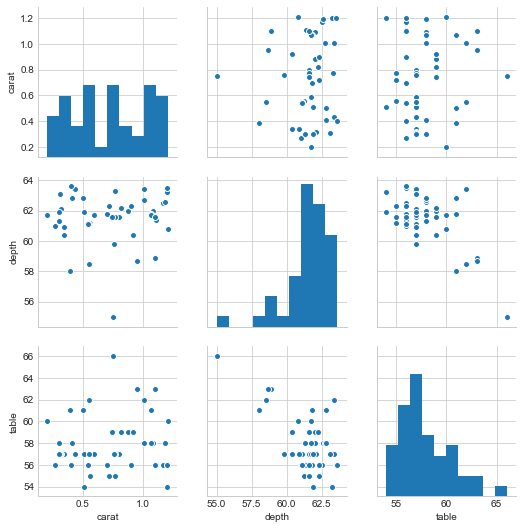

In [49]:
MySampleData_3 = MySampleData_2[["carat","depth","table"]]
sb.pairplot(MySampleData_3, palette ="hls")

The variables passed the independent test. We also know that our sample data has no missing values and outliers, so we can go ahead and fit a multilinear regression model:

$y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \beta_{3}X_{3} + \mu_{i}$,

to our sample data, where price is the dependent or target variable as y, and independent variables 𝑋1, 𝑋2, and 𝑋3 as carat, depth, and table, respectively. The model is as follows:

In [50]:
X2 = pd.DataFrame(MySampleData_2[["carat","depth","table"]])
y2 = pd.DataFrame(MySampleData_2["price"])

X2, y2 = scale(X2), y2 
Lin_Reg_2 = LinearRegression(normalize=True) 

Lin_Reg_2.fit(X2,y2)

print (Lin_Reg_2.score(X2,y2)) # Gives us the R-Squared

0.882682282688334


88.27% of the variations in 𝑦-variable is being explained by the 𝑋-variable, which is good.

In [52]:
print(Lin_Reg_2.coef_)

[[1813.54026264   69.35276249 -127.2570541 ]]


In [53]:
print(Lin_Reg_2.intercept_) 

[2859.41304348]


The deduced fitted model is:
    
$\hat{y} = 2859.41 + 1813.54X_{1} + 69.35X_{2} - 127.26X_{3}.$

We print the first 10 predictions of future diamond prices using the fitted model:

In [54]:
predictions2 = Lin_Reg_2.predict(X2)
print(predictions2[0:10])

[[2027.9384295 ]
 [ 601.46075052]
 [3352.43230322]
 [2824.74248123]
 [3738.0060937 ]
 [5920.11846257]
 [1815.1512641 ]
 [ 589.56393857]
 [5612.90640855]
 [3249.45123157]]


### Note:
The disadvantage of using scikit-learn to perform regression analysis in python is that we do not get the opportunity to see or calculate Adjusted R-squared, which gives us an idea of the explanatory power of the added variables. That is, if the added variable(s) are useful to the model or not. We also don't have the opportunity to see residual plots. An alternative in python is to use the statsmodels.api package.